### Chargement et affichage de l'ensemble de données de notre dataset
Importation des Bibliothèques et paquets Python nécessaires

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier # random forrest
from sklearn import svm #SVM
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

Exploration de notre base de données; extraire l'ensemble de données sous forme de dataframe pandas à partir d'un fichier csv (ensemble de données artificielles) :

In [2]:
cols_list = ['temperature',
             'toux',
             'rythme respiratoire']
symptoms = pd.read_csv ('dataset.csv',
                        usecols=cols_list)
results = pd.read_csv ('dataset.csv', 
                       usecols=['target'])
print(symptoms.head()) 

   temperature  toux  rythme respiratoire
0    38.340347     0            24.632550
1    37.873831     0            19.402232
2    39.323513     1            25.083946
3    37.312461     1            23.507115
4    37.605350     1            18.879044



**"results"** = Il est la caractéristique que nous essayons de prévoir (Output). Dans ce cas, nous essayons de prédire si notre cible "Target" est infectée par Covid_19 ou non. C'est-à-dire que nous allons utiliser ici la colonne  "Target".  
**"symptoms"** = Les prédicteurs qui sont les colonnes restantes (température, toux, rythme respiratoire)

In [3]:
symptoms.shape

(25000, 3)

Comme on peut le voir, nous avons 25000 lignes (Instances) et 3 colonnes (Features)

In [4]:
symptoms.columns


Index(['temperature', 'toux', 'rythme respiratoire'], dtype='object')

Ci-dessus se trouve le nom de chaque symptôme de notre dataframe.


Visualiser nos données 


In [5]:
data=symptoms.copy()
data[['target']] = results[['target']]

In [6]:
symptoms.columns

Index(['temperature', 'toux', 'rythme respiratoire'], dtype='object')

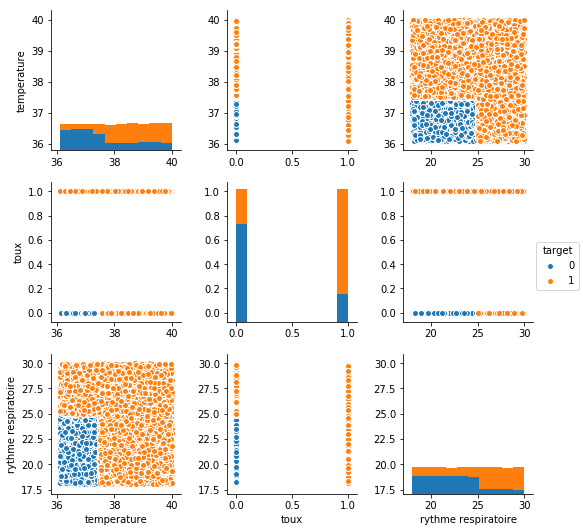

In [7]:
sns.pairplot(data, hue = 'target',
             vars = ['temperature',
                     'toux',
                     'rythme respiratoire'])

Les graphs ci-dessus montrent la relation entre nos caractéristiques (features).

**N.B :**

1,0 (Orange) = Personne testée positif (Covid_19)

0,0 (bleu) = Personne estée négatif (not Covid_19)

Combien de personnes ont été testées positives et négatives dans notre ensemble de données 

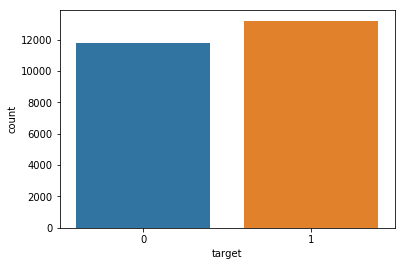

In [8]:
sns.countplot(data['target'], label = "Count")

### Entrainement du modèle :
#### Prétraitement de l'ensemble des données 
##### Répartition des données, 80% pour la formation et 20% pour le test
* Données d'entrainement  = C'est le sous-ensemble de nos données utilisées pour former(entrainer) notre modèle.  
* Données de test = Sous-ensemble de données que le modèle n'a jamais vu auparavant. Elles sont utilisées pour tester la performance de notre modèle.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    symptoms.values.tolist(),
    results.values.tolist(),
    test_size=0.2,
    random_state=20) 

##### Amélioration notre modèle
nous allons essayer est en Normalisant nos données  
La normalisation des données est un processus de mise à l'échelle des features qui amène toutes les valeurs dans un intervalle [0,1].  
X' = (X-X_min) / (X_max - X_min)-----> X_range   

##### normalisation des données d'entrainement :

In [10]:
X_train_range = (pd.DataFrame(X_train).max() 
                 - pd.DataFrame(X_train).min())
X_train_range.head()
X_train_scaled = (pd.DataFrame(X_train) 
                  - pd.DataFrame(X_train).min())/(X_train_range)
X_train_scaled.head()

,0,1,2
0,0.277694,0.0,0.536812
1,0.984907,1.0,0.751122
2,0.803622,0.0,0.162548
3,0.298041,1.0,0.417051
4,0.003360,0.0,0.272221


#### Créer le classificateur SVM et RF

In [11]:
#SVM
SVM_clf = svm.SVC(kernel="rbf",
              gamma='auto') # rbf Kernel
#Random Forrest
RF_clf=RandomForestClassifier(n_estimators=100)

##### entrainer le modèle SVM et RF avec l'ensemble de données d'entrainement

In [12]:
#Train the models using the training sets
y_train = np.ravel(y_train)
SVM_clf.fit(X_train_scaled, y_train)
RF_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Tester le modèle
#### normalisation des données de test :

In [13]:
X_test_range = (pd.DataFrame(X_test) - 
                pd.DataFrame(X_test).min()).max()
X_test_range.head()
X_test_scaled = (pd.DataFrame(X_test) - 
                 pd.DataFrame(X_test).min())/(X_test_range)
X_test_scaled.head()

,0,1,2
0,0.410099,0.0,0.707187
1,0.286181,1.0,0.568741
2,0.326133,1.0,0.683456
3,0.507919,0.0,0.465613
4,0.821815,0.0,0.067671


#### Utiliser le modèle entrainé pour faire une prédiction sur les données de test

In [14]:

#Predict the response for test dataset\
y_pred_SVM = SVM_clf.predict(X_test_scaled)
y_pred_RF = RF_clf.predict(X_test_scaled)

In [15]:
X_test_scaled.head()

,0,1,2
0,0.410099,0.0,0.707187
1,0.286181,1.0,0.568741
2,0.326133,1.0,0.683456
3,0.507919,0.0,0.465613
4,0.821815,0.0,0.067671


nous vérifierons l'exactitude de nos classifiacteur en la comparant à la sortie dont nous disposons déjà (y_test) du SVM et du RF. Nous allons utiliser la matrice de confusion pour cette comparaison

In [16]:
#accuracy value :
print("SVM classifier accuracy : ",metrics.accuracy_score(y_test,y_pred_SVM))
print("RF classifier accuracy : ",metrics.accuracy_score(y_test,y_pred_RF))

SVM classifier accuracy :  0.9498
RF classifier accuracy :  1.0


#### La matrice de confusion

Une matrice de confusion pour une tâche de classification binaire :

| | PredictedNegative | PredictedPositive |
| --- | --- | --- |
| Négatif réel | vrai négatif  (TN) | faux positif (FP) |
| Positif réel |  faux négatif (FN) | vrai positif  (TP) |
Dans un classificateur binaire, la classe "vrai" est généralement étiquetée avec 1 et la classe "faux" avec 0.
* **Vrai Positif** : une observation de classe positive (1) est correctement classée comme positive par le modèle.
* **Faux positif** : Une observation de classe négative (0) est incorrectement classée comme positive.
* **Vrai négatif** : une observation de classe négative est correctement classée comme négative.
* **Faux négatif** : une observation de classe positive est incorrectement classée comme négative.

Les colonnes de la matrice de confusion s'additionnent aux prédictions par classe. Les lignes de la matrice s'additionnent aux valeurs réelles à l'intérieur de chaque classe. Vous pouvez rencontrer des matrices de confusion où le réel est dans les colonnes et le prédit est dans les lignes : la signification est la même mais le tableau sera réorienté.
 
**_Note:_** Se souvenir de ce que représentent les cellules de la matrice de confusion peut être un peu délicat. Le premier mot (Vrai ou Faux) indique si le modèle était correct ou non. Le deuxième mot (Positif ou Négatif) indique la supposition du modèle (et non l'étiquette réelle)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
import matplotlib.pyplot as plt
from seaborn import heatmap

Créons une matrice de confusion pour notre classificateur sur l'ensemble des données de test.

In [18]:
y_test = np.array(y_test) # casting y_test type to numpy array

In [19]:
#confusion matrix :
cm_SVM = np.array(confusion_matrix(y_test,
                                   y_pred_SVM,
                                   labels =[1,0]))
confusion_SVM = pd.DataFrame(cm_SVM,
                         index=['testée positive',
                                'testée négative'],
                         columns=['prédit positive',
                                  'prédit négative'])
print("la matrice du confusion du SVM est :")
confusion_SVM


la matrice du confusion du SVM est :


,prédit positive,prédit négative
testée positive,2481,118
testée négative,133,2268


In [20]:
cm_RF = np.array(confusion_matrix(y_test,
                                  y_pred_RF,
                                  labels =[1,0]))
confusion_RF = pd.DataFrame(cm_SVM,
                         index=['testée positive',
                                'testée négative'],
                         columns=['prédit positive',
                                  'prédit négative'])
print("la matrice du confusion du Random Forest est :")
print(confusion_RF) 

la matrice du confusion du Random Forest est :
                 prédit positive  prédit négative
testée positive             2481              118
testée négative              133             2268


#### générer un rapport sur les perfomances de notre modèle 

In [21]:
print("la matrice du confusion du SVM est :")
print(classification_report(y_test,y_pred_SVM))
print("la matrice du confusion du  Random Forest est :")
print(classification_report(y_test,y_pred_RF))

la matrice du confusion du SVM est :
             precision    recall  f1-score   support

          0       0.95      0.94      0.95      2401
          1       0.95      0.95      0.95      2599

avg / total       0.95      0.95      0.95      5000

la matrice du confusion du  Random Forest est :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2401
          1       1.00      1.00      1.00      2599

avg / total       1.00      1.00      1.00      5000



**PRECISION** : La capacité du classificateur à éviter de classifier une classe comme membre d'une autre classe.
_Precision = True Positives / (True Positives + False Positives)_

Une note de précision de 1 indique que le classificateur n'a jamais classé par erreur la classe actuelle comme une autre classe. Une note de précision de 0 signifie que le classificateur a mal classé tous les  instances de la classe actuelle

**RECALL/SENSITIVITY** : La capacité du classificateur à identifier correctement la classe actuelle.

_Recall = True Positives / (True Positives + False Negatives)_

Un rappel (recall) de 1 indique que le classificateur a correctement prédit toutes les observations de la classe. Un rappel de 0 signifie que le classificateur a prédit incorrectement toutes les observations de la classe actuelle.

**F1-SCORE** : La moyenne harmonique est utilisée ici plutôt que la moyenne arithmétique plus conventionnelle, car la moyenne harmonique est plus appropriée pour le calcul de la moyenne des taux.
_F1-Score = 2 * (Precision * Recall) / (Precision + Recall)_

la meilleure valeur du f1-score est 1 et la pire valeur est 0, comme les scores de précision et de recall. Il s'agit d'une mesure utile pour prendre en compte les deux mesures à la fois.

**SUPPORT** : La somme marginale des lignes dans la matrice de confusion, ou en d'autres termes le nombre total d'observations appartenant à une classe indépendamment de la prédiction.

#### enregistrer les modèles sous forme de pickle object : 

In [22]:
# save the models to disk
import pickle 
filename1 = 'finalized_model_SVM.sav'
filename2 = 'finalized_model_RF.sav'

pickle.dump(SVM_clf, open(filename1, 'wb'))
pickle.dump(SVM_clf, open(filename2, 'wb'))

#### charger les modèles sous forme de pickle object : 

In [23]:
# load the models from disk
loaded_model_SVM = pickle.load(open(filename1, 'rb'))
loaded_model_RF = pickle.load(open(filename2, 'rb'))

#### test d'une seule ligne après le chargemenet de fichier pickle de notre modèle:

In [24]:
temperature= 40;toux=0; rythme_respiratoire=30
test = [temperature,toux,rythme_respiratoire]
#print(pd.DataFrame(test))
#print(pd.DataFrame(X_test).min())
#normalisation de la ligne de test
test_scaled = (pd.DataFrame(test)[0] - 
               pd.DataFrame(X_test).min())/(X_test_range)
y_pred_SVM = loaded_model_SVM.predict([test_scaled,])
if y_pred_SVM == 1:
    print("La personne a COVID-19 selon SVM Classifier")
else :
    print("La personne n'a pas de COVID-19 selon SVM classifier")
y_pred_RF = loaded_model_RF.predict([test_scaled,])
if y_pred_RF == 1:
    print("La personne a COVID-19 selon RF Classifier")
else :
    print("La personne n'a pas de COVID-19 selon RF classifier")

La personne a COVID-19 selon SVM Classifier
La personne a COVID-19 selon RF Classifier
